# Import Necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
fraud_check = pd.read_csv('Fraud_check.csv')
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# Data Understanding

In [3]:
fraud_check.shape

(600, 6)

In [4]:
fraud_check.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
fraud_check.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [6]:
fraud_check.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


# Data Preparation

In [9]:
fraud_check["income"]="<=30000"
fraud_check.loc[fraud_check["Taxable.Income"]>30000,"income"]="Good"
fraud_check.loc[fraud_check["Taxable.Income"]<=30000,"income"]="Risky"

In [10]:
fraud_check

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,income
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [11]:
del fraud_check['Taxable.Income']

In [12]:
le = LabelEncoder()
for column_names in fraud_check.columns:
    if fraud_check[column_names].dtype == object:
        fraud_check[column_names] = le.fit_transform(fraud_check[column_names])
    else:
        pass

In [13]:
fraud_check

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0
...,...,...,...,...,...,...
595,1,0,39492,7,1,0
596,1,0,55369,2,1,0
597,0,0,154058,0,1,0
598,1,1,180083,17,0,0


In [14]:
fraud_check.dtypes

Undergrad          int64
Marital.Status     int64
City.Population    int64
Work.Experience    int64
Urban              int64
income             int64
dtype: object

In [15]:
corr_matrix = fraud_check.corr().round(2)
corr_matrix

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,income
Undergrad,1.00,0.04,0.08,-0.01,-0.00,0.01
Marital.Status,0.04,1.00,-0.00,-0.00,0.06,0.01
City.Population,0.08,-0.00,1.00,0.01,-0.04,0.01
Work.Experience,-0.01,-0.00,0.01,1.00,-0.09,-0.00
Urban,-0.00,0.06,-0.04,-0.09,1.00,0.00
income,0.01,0.01,0.01,-0.00,0.00,1.00


# Model Building

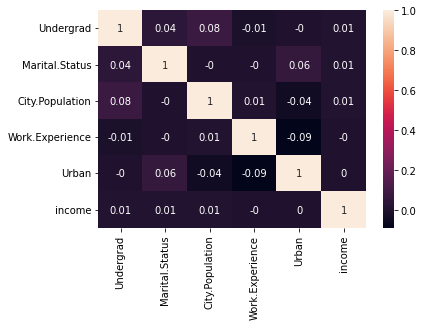

In [16]:
sns.heatmap(corr_matrix,annot=True)

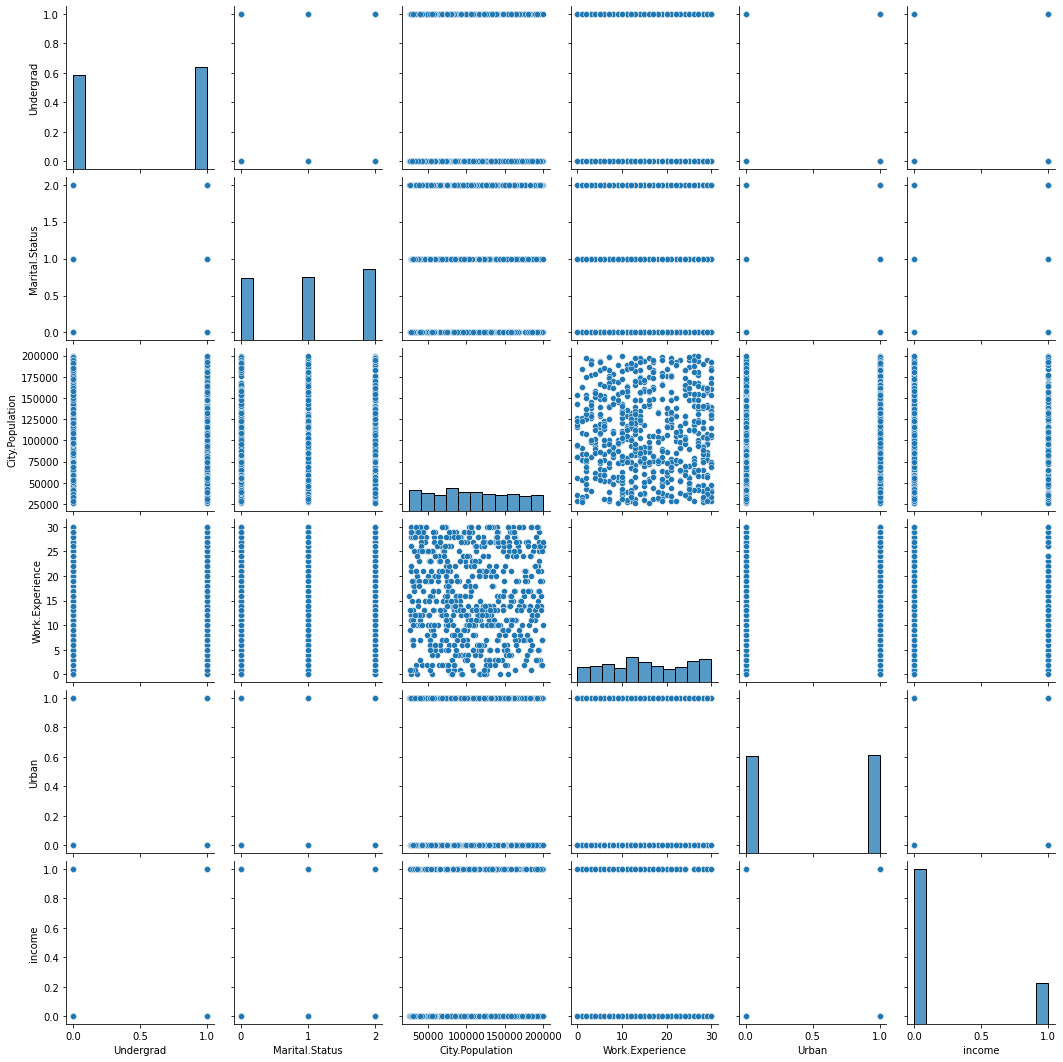

In [17]:
sns.pairplot(data=fraud_check)
plt.show()

In [18]:
X= fraud_check.drop('income',axis=1)
y=fraud_check[['income']]

In [19]:
transformed_data = StandardScaler()
transformed_data = transformed_data.fit_transform(X)
transformed_data = pd.DataFrame(data=transformed_data,columns=[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']])
transformed_data

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,-1.040833,1.160800,-1.178521,-0.629143,0.993355
1,0.960769,-1.274445,0.508500,0.276370,0.993355
2,-1.040833,-0.056822,1.033109,1.634639,0.993355
3,0.960769,1.160800,1.696831,-0.063197,0.993355
4,-1.040833,-0.056822,-1.630532,1.408261,-1.006689
...,...,...,...,...,...
595,0.960769,-1.274445,-1.390432,-0.968710,0.993355
596,0.960769,-1.274445,-1.071672,-1.534655,0.993355
597,-1.040833,-1.274445,0.909696,-1.761033,0.993355
598,0.960769,-0.056822,1.432197,0.163181,-1.006689


In [20]:
X.shape,y.shape

((600, 5), (600, 1))

In [21]:
X_train,X_test,y_train,y_test = train_test_split(transformed_data,y,test_size=0.20,random_state=12,shuffle=True,stratify=y)

In [22]:
X_train.shape,y_train.shape

((480, 5), (480, 1))

In [23]:
X_test.shape,y_test.shape

((120, 5), (120, 1))

In [24]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

# Model Testing || Model Evaluation

### Training Data

In [25]:
y_pred_train = rf_model.predict(X_train)

In [26]:
accuracy_score(y_train,y_pred_train)

1.0

In [27]:
confusion_matrix(y_train,y_pred_train)

array([[381,   0],
       [  0,  99]])

In [28]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00        99

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



1.0


Text(0, 0.5, 'True Positive Rate')

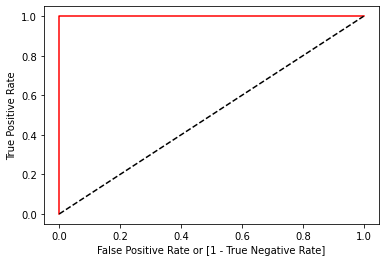

In [29]:
fpr, tpr, thresholds = roc_curve(y_train, rf_model.predict_proba (X_train)[:,1])
auc = roc_auc_score(y_train,y_pred_train)
print(auc)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Test Data 

In [30]:
y_pred_test = rf_model.predict(X_test)

In [31]:
accuracy_score(y_test,y_pred_test)

0.7333333333333333

In [32]:
confusion_matrix(y_test,y_pred_test)

array([[87,  8],
       [24,  1]])

In [33]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84        95
           1       0.11      0.04      0.06        25

    accuracy                           0.73       120
   macro avg       0.45      0.48      0.45       120
weighted avg       0.64      0.73      0.68       120



0.47789473684210526


Text(0, 0.5, 'True Positive Rate')

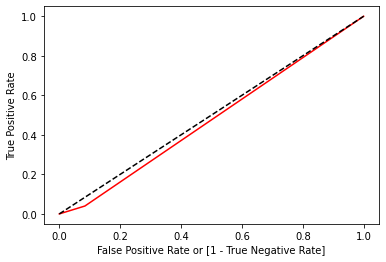

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc = roc_auc_score(y_test,y_pred_test)
print(auc)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# Data Balancing

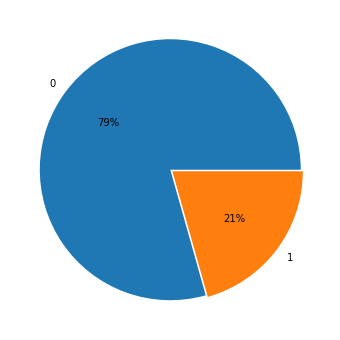

In [35]:
plt.figure(figsize=(6,6))
plt.pie(x = y_train.value_counts(), explode=[0,0.02], labels=['0','1'], autopct='%1.0f%%')
plt.show()

In [36]:
over_sample = SMOTE()

In [37]:
X_train,y_train = over_sample.fit_resample(X_train,y_train)

In [38]:
X_train.shape,y_train.shape

((762, 5), (762, 1))

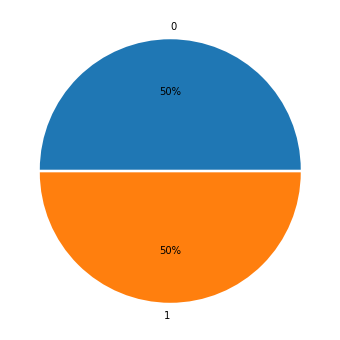

In [39]:
plt.figure(figsize=(6,6))
plt.pie(x = y_train.value_counts(), explode=[0,0.02], labels=['0','1'], autopct='%1.0f%%')
plt.show()

In [40]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

RandomForestClassifier()

# Model Testing || Model Evaluation

### Training Data

In [41]:
y_pred_train = rf_model.predict(X_train)

In [42]:
accuracy_score(y_train,y_pred_train)

1.0

In [43]:
confusion_matrix(y_train,y_pred_train)

array([[381,   0],
       [  0, 381]])

In [44]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00       381

    accuracy                           1.00       762
   macro avg       1.00      1.00      1.00       762
weighted avg       1.00      1.00      1.00       762



1.0


Text(0, 0.5, 'True Positive Rate')

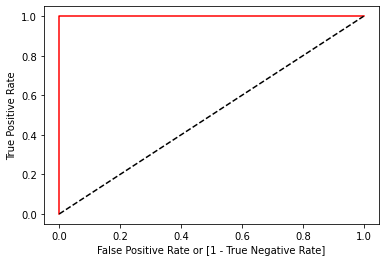

In [45]:
fpr, tpr, thresholds = roc_curve(y_train, rf_model.predict_proba (X_train)[:,1])
auc = roc_auc_score(y_train,y_pred_train)
print(auc)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Test Data 

In [46]:
y_pred_test = rf_model.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred_test)

0.6666666666666666

In [48]:
confusion_matrix(y_test,y_pred_test)

array([[75, 20],
       [20,  5]])

In [49]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        95
           1       0.20      0.20      0.20        25

    accuracy                           0.67       120
   macro avg       0.49      0.49      0.49       120
weighted avg       0.67      0.67      0.67       120



0.49473684210526314


Text(0, 0.5, 'True Positive Rate')

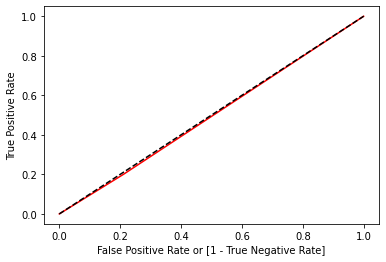

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
auc = roc_auc_score(y_test,y_pred_test)
print(auc)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### We can see model over fitting problem by looking in to accuracy score of train data and test data to over come over fitting problem we need to tweake the hyperparamsters we can come to optimal value of hyperparamaters using grid searchCV

In [51]:
grid_search = GridSearchCV(estimator = rf_model, 
                        param_grid = {'n_estimators':[75,100,125,150,200,225,250,275],
                                         'criterion':['entropy','gini'],
                                         'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],},
                                    cv=5
                                           )
grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

print(grid_search.best_score_)

{'criterion': 'gini', 'max_depth': 17, 'n_estimators': 275}
0.7915204678362573


In [53]:
rf_model_1 = RandomForestClassifier(n_estimators=275,criterion='gini',max_depth=17)
rf_model_1.fit(X_train,y_train)

RandomForestClassifier(max_depth=17, n_estimators=275)

# Model Testing || Model Evaluation

### Training Data

In [54]:
y_pred_train_1 = rf_model_1.predict(X_train)

In [55]:
accuracy_score(y_train,y_pred_train_1)

1.0

In [56]:
confusion_matrix(y_train,y_pred_train_1)

array([[381,   0],
       [  0, 381]])

In [57]:
print(classification_report(y_train,y_pred_train_1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       381
           1       1.00      1.00      1.00       381

    accuracy                           1.00       762
   macro avg       1.00      1.00      1.00       762
weighted avg       1.00      1.00      1.00       762



1.0


Text(0, 0.5, 'True Positive Rate')

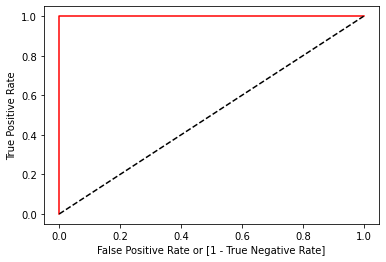

In [58]:
fpr, tpr, thresholds = roc_curve(y_train, rf_model_1.predict_proba (X_train)[:,1])
auc = roc_auc_score(y_train,y_pred_train_1)
print(auc)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Test Data 

In [59]:
y_pred_test_1 = rf_model.predict(X_test)

In [60]:
accuracy_score(y_test,y_pred_test_1)

0.6666666666666666

In [61]:
confusion_matrix(y_test,y_pred_test_1)

array([[75, 20],
       [20,  5]])

In [62]:
print(classification_report(y_test,y_pred_test_1))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        95
           1       0.20      0.20      0.20        25

    accuracy                           0.67       120
   macro avg       0.49      0.49      0.49       120
weighted avg       0.67      0.67      0.67       120



0.49473684210526314


Text(0, 0.5, 'True Positive Rate')

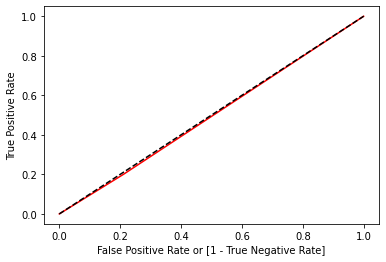

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_1)
auc = roc_auc_score(y_test,y_pred_test)
print(auc)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# Model Deployement

In [64]:
from pickle import dump

In [65]:
dump(rf_model_1,open('fraud_intel.pkl','wb'))

In [66]:
from pickle import load

In [67]:
loaded_intell_file = load(open('fraud_intel.pkl','rb'))

In [68]:
y_pred_new_sample = loaded_intell_file.predict(X_test)

In [69]:
accuracy_score(y_test,y_pred_new_sample)

0.6583333333333333